<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms:  

- KNN
- Decision Tree
- SVM
- Logistic Regression

and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [192]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

np.set_printoptions(precision=2)

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

### Load training data from CSV File  

In [193]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [194]:
df_train = pd.read_csv('loan_train.csv')
df_train.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [195]:
df_train.shape

(346, 10)

### Load test set for model evaluation 

In [196]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [197]:
df_test = pd.read_csv('loan_test.csv')
df_test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [198]:
df_test.shape

(54, 10)

#### <font color=red>Merge Two Datasets</font>
<p>

We will merge df_train and df_test into one df to perform the exact same preprocessing for both datasets. After merging df.iloc[0:346, :] will be our training data, and df.iloc[346:, :] will be test data, both stored in the same dataframe. To compute and display statistics for 346 first rows only we will need to slice our dataframe.   
<p>
Data preprocessing will include the following steps:
<p>
1 Converting dates to days of week  
2 Adding weekend 0/1 flag to data (lambda x: 1 if (x>3)  else 0)  
3 Converting categorical feature "gender" to numerical values 0/1  
4 One Hot Encoding for "education" by adding 4 dummy columns and then dropping one of them
<p>
Dropping some training rows while preprocessing (e.g. rows with NaNs in the target column) would shift test subset up. Fortunately, we are not dropping any rows from our training data in this project, so we don't need to worry about that.  
<p>
<font color=red>
__NOTICE:__ After merging 2 datasets together some of the descriptive statistics and histogram plots in this notebook will be computed and generated for the whole dataset, not just for the first 346 rows from 'loan_train.csv' as in the original notebook. So compared to the sample notebook, they might look slightly different, but similar. This is a good sign, by the way. For the classifiers work properly input training and test distributions must be similar. 
</font>

In [199]:
print("Test data start from row=", df_train.shape[0])
df = pd.concat([df_train, df_test])
df.iloc[346:351, :]

Test data start from row= 346


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


### Convert to date time object 

In [200]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in the first 346 rows of our data set 

In [201]:
#df['loan_status'].value_counts()
df.iloc[0:346,2].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better.

<font color="red">
__NOTICE:__ Histograms are generated using data from all rows, not just the first 346 
</font>

# notice: installing seaborn might take a few minutes
#!conda install -c anaconda seaborn -y

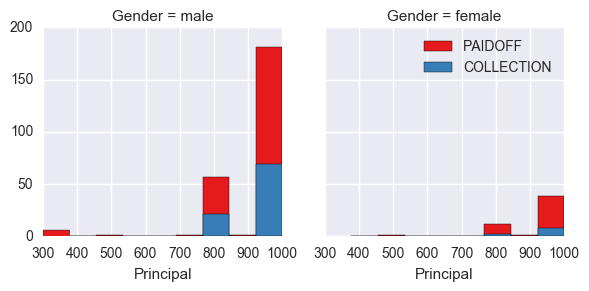

In [202]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

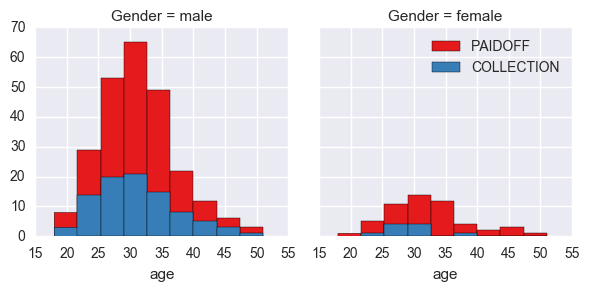

In [203]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

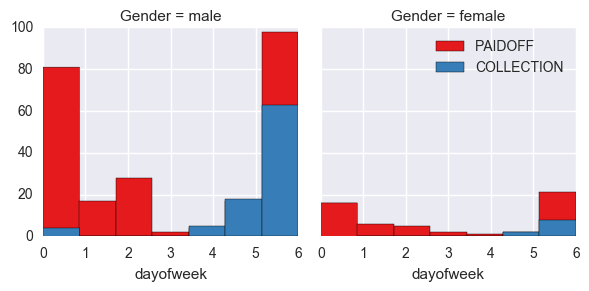

In [204]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 8)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

<font color="red">
__NOTICE:__ Histograms are generated using data from all rows, not just the first 346 
</font>

In [205]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


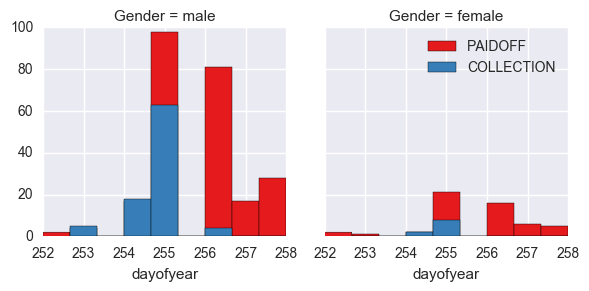

In [206]:
df['dayofyear'] = df['effective_date'].dt.dayofyear
bins = np.linspace(df.dayofyear.min(), df.dayofyear.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofyear', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

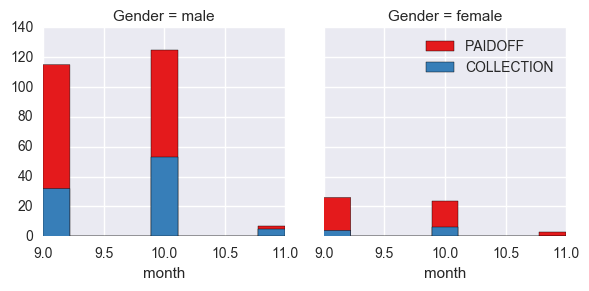

In [207]:
df['month'] = df['due_date'].dt.month
bins = np.linspace(df.month.min(), df.month.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'month', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [208]:
df['principal_daily'] = df['Principal'] / df['terms']
df['principal_daily'].value_counts()

33.333333     207
53.333333      85
66.666667      80
142.857143     11
26.666667       6
42.857143       6
46.666667       1
71.428571       1
114.285714      1
60.000000       1
128.571429      1
Name: principal_daily, dtype: int64

## Convert Categorical features to numerical values

Lets look at gender in the first 346 rows:

In [209]:
#df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
df.iloc[0:346,[2,9]].groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [210]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,dayofyear,month,principal_daily
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0,252,10,33.333333
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0,252,10,33.333333
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0,252,9,66.666667
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1,253,10,33.333333
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1,253,10,33.333333


## One Hot Encoding  
#### How about education?

In [211]:
#df['education'].value_counts().plot(kind='bar')
df['education'].value_counts()

college                 172
High School or Below    172
Bechalor                 52
Master or Above           4
Name: education, dtype: int64

In [212]:
#df.groupby(['education'])['loan_status'].value_counts(normalize=True)
df.iloc[0:346,[2,8]].groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding

In [213]:
df[['Principal','terms','age','Gender','weekend','education']].head()

,Principal,terms,age,Gender,weekend,education
0,1000,30,45,0,0,High School or Below
1,1000,30,33,1,0,Bechalor
2,1000,15,27,0,0,college
3,1000,30,28,1,1,college
4,1000,30,29,0,1,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [214]:
Feature = df[['Principal','terms','age','Gender','weekend','principal_daily']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature['Bechalor'] = Feature['Bechalor'] + Feature['Master or Above'] # add Masters to Bechalors
Feature.drop(['Master or Above'], axis = 1,inplace=True) # drop 'Master or Above' since it has only 4 non-zeroes
Feature.head()

,Principal,terms,age,Gender,weekend,principal_daily,Bechalor,High School or Below,college
0,1000,30,45,0,0,33.333333,0,1,0
1,1000,30,33,1,0,33.333333,1,0,0
2,1000,15,27,0,0,66.666667,0,0,1
3,1000,30,28,1,1,33.333333,0,0,1
4,1000,30,29,0,1,33.333333,0,0,1


## Split data into training, validation and test subsets

Lets define feature set X and label vector y that will be used for training and validation

In [215]:
X = Feature.iloc[0:346, :] 
print(X.shape[0])
X[0:5]

346


,Principal,terms,age,Gender,weekend,principal_daily,Bechalor,High School or Below,college
0,1000,30,45,0,0,33.333333,0,1,0
1,1000,30,33,1,0,33.333333,1,0,0
2,1000,15,27,0,0,66.666667,0,0,1
3,1000,30,28,1,1,33.333333,0,0,1
4,1000,30,29,0,1,33.333333,0,0,1


What are our lables?

In [216]:
y = df.iloc[0:346, 2] .values # column 'loan_status'
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

Now define feature set X_test and label vector y_test that will be used for testing the final models

In [217]:
X_test = Feature.iloc[346:, :] 
print(X_test.shape[0])
X_test[0:5]

54


,Principal,terms,age,Gender,weekend,principal_daily,Bechalor,High School or Below,college
0,1000,30,50,1,0,33.333333,1,0,0
1,300,7,35,0,1,42.857143,1,0,0
2,1000,30,43,1,1,33.333333,0,1,0
3,1000,30,26,0,1,33.333333,0,0,1
4,800,15,29,0,1,53.333333,1,0,0


In [218]:
y_test = df.iloc[346:, 2] .values # column 'loan_status'
y_test[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

#### Randomly split X, y into training and validation subsets

In [219]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=3)

# Count values in y_valid to make sure both values (PAIDOFF and COLLECTION) are present in it, and the ratio is close to 1:3
#[np.count_nonzero(y == 'PAIDOFF'), np.count_nonzero(y != 'PAIDOFF')]
[np.count_nonzero(y_valid == 'PAIDOFF'), np.count_nonzero(y_valid != 'PAIDOFF')]

[47, 23]

In [220]:
# Check sizes, make sure they match
print("Train+Valid:\t", [X.shape[0], y.shape[0]])
print("Train:\t\t", [X_train.shape[0], y_train.shape[0]])
print("Valid:\t\t", [X_valid.shape[0], y_valid.shape[0]])
print("Test:\t\t", [X_test.shape[0], y_test.shape[0]])

Train+Valid:	 [346, 346]
Train:		 [276, 276]
Valid:		 [70, 70]
Test:		 [54, 54]


## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train\validation\test split ).  

StandardScaler.fit(X_train) calculates the mean and variance from the values in X_train. Then calling .transform() transforms all of the features by subtracting the mean and dividing by the variance. 

The reason we want to fit the scaler using only the training data is because we don't want to bias our models with information from the validation and test data. If we fit() to all data, we would compute a different mean and std for each feature. In theory these values may be very similar if your test, validation and training sets have the same distribution, but in practice this is typically not the case. Normally we should only transform validation and test data by using the parameters computed on the training data, i.e. X_train in our case.

<font color="red">
However, in this particular assignment we will fit StandardScaler to X that contains both training and validation data
</font>

In [221]:
scaler = preprocessing.StandardScaler()

scaler.fit(X_train)
#scaler.fit(X)

C:\Users\nely_\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

<font color="red">
Use scaler to transform X_train
</font>

In [222]:
X_train = scaler.transform(X_train)
X_train[0:5]

C:\Users\nely_\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[-1.27, -1.96,  0.66, -0.42,  0.86,  2.99, -0.37,  1.12, -0.87],
       [ 0.49,  0.88, -0.47, -0.42, -1.17, -0.65, -0.37, -0.9 ,  1.15],
       [-1.27, -0.97,  0.66, -0.42, -1.17,  0.25,  2.67, -0.9 , -0.87],
       [ 0.49,  0.88, -0.15, -0.42,  0.86, -0.65, -0.37,  1.12, -0.87],
       [ 0.49,  0.88,  0.82, -0.42,  0.86, -0.65, -0.37, -0.9 ,  1.15]])

<font color="red">
Use scaler to transform X_valid
</font>

In [223]:
X_valid = scaler.transform(X_valid)
X_valid[0:5]

C:\Users\nely_\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[-1.27, -0.97,  0.5 ,  2.36,  0.86,  0.25, -0.37, -0.9 ,  1.15],
       [ 0.49,  0.88,  0.01, -0.42,  0.86, -0.65, -0.37, -0.9 ,  1.15],
       [ 0.49, -0.97,  0.01, -0.42,  0.86,  0.85, -0.37, -0.9 ,  1.15],
       [-1.27, -0.97,  1.14, -0.42,  0.86,  0.25,  2.67, -0.9 , -0.87],
       [ 0.49, -0.97, -0.95,  2.36, -1.17,  0.85, -0.37,  1.12, -0.87]])

<font color="red">
Use scaler to transform X_test  
</font>

In [224]:
X_test = scaler.transform(X_test)
X_test[0:5]

C:\Users\nely_\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.49,  0.88,  3.06,  2.36, -1.17, -0.65,  2.67, -0.9 , -0.87],
       [-5.67, -1.96,  0.66, -0.42,  0.86, -0.22,  2.67, -0.9 , -0.87],
       [ 0.49,  0.88,  1.94,  2.36,  0.86, -0.65, -0.37,  1.12, -0.87],
       [ 0.49,  0.88, -0.79, -0.42,  0.86, -0.65, -0.37, -0.9 ,  1.15],
       [-1.27, -0.97, -0.31, -0.42,  0.86,  0.25,  2.67, -0.9 , -0.87]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithms:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

Import some additional libraries and define some functions that will be used later on in this notebook

In [225]:
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report, confusion_matrix

def evaluate(clf, model_name, X_valid, y_valid, X_test, y_test): 
    # Validation accuracy
    ypr_valid = clf.predict(X_valid)
    if model_name == 'Logistic Regression':
        ypr_prob = clf.predict_proba(X_valid)
        logloss = log_loss(y_valid, ypr_prob)
    else:
        logloss = 'NA'
    df_report_valid.loc[df_report_valid.shape[0]] = [
        model_name, 
        jaccard_similarity_score(y_valid, ypr_valid),
        f1_score(y_valid, ypr_valid, average='weighted'),
        logloss]

    # Test accuracy
    ypr_test = clf.predict(X_test)
    if model_name == 'Logistic Regression':
        ypr_prob = clf.predict_proba(X_test)
        logloss = log_loss(y_test, ypr_prob)
    else:
        logloss = 'NA'
    df_report_test.loc[df_report_test.shape[0]] = [
        model_name, 
        jaccard_similarity_score(y_test, ypr_test),
        f1_score(y_test, ypr_test, average='weighted'),
        logloss]
    
    print(df_report_test)
    
    return ypr_valid, ypr_test

def mean_std_accuracy(y, ypr):
    mean_acc = metrics.accuracy_score(y, ypr)    
    std_acc = np.std(ypr==y) / np.sqrt(ypr.shape[0])
    return mean_acc, std_acc

def plot_mean_std_accuracy(param, mean_acc, std_acc, param_name):    
    numerical_dtype_kinds = {'b','u','i','f','c'}
    if param.dtype.kind in numerical_dtype_kinds:
        plt.plot(param,mean_acc,'g')
        plt.fill_between(param, mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
    else:
        plt.plot(np.arange(len(param)),mean_acc,'g')
        plt.fill_between(np.arange(len(param)), mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
        plt.xticks(np.arange(len(param)), param)
    plt.legend(('Accuracy ', '+/- 3xstd'))
    plt.ylabel('Validation Accuracy ')
    plt.xlabel(param_name)
    plt.tight_layout()
    plt.show()

Define dataframes for storing validation and test results for different algorithms/models

In [226]:
df_report_valid = pd.DataFrame(columns=['Algorithm', 'Jaccard', 'F1-score', 'LogLoss'])
df_report_test = pd.DataFrame(columns=['Algorithm', 'Jaccard', 'F1-score', 'LogLoss'])

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

[0.63 0.63 0.69 0.66 0.61 0.61 0.63 0.67 0.67]


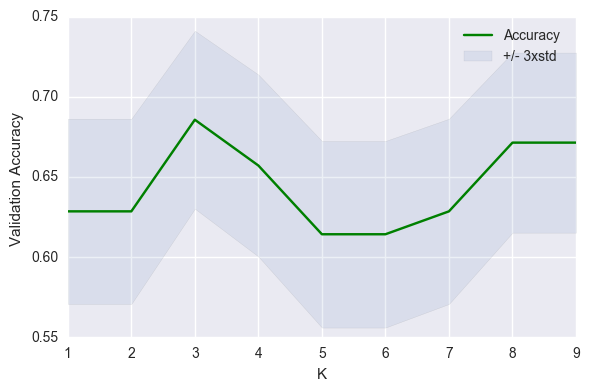

In [227]:
from sklearn.neighbors import KNeighborsClassifier

params = np.array(range(1,10))
mean_acc = np.zeros(len(params))
std_acc = np.zeros(len(params))
for n in params:
    clf = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    ypr = clf.predict(X_valid)
    mean_acc[n-1], std_acc[n-1] = mean_std_accuracy(y_valid, ypr)    
print(mean_acc)    
    
plot_mean_std_accuracy(params, mean_acc, std_acc, "K")

In [228]:
K = params[np.argmax(mean_acc)]
print("Optimal K=", K)
knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)

yknn_valid, yknn_test = evaluate(knn, 'KNN', X_valid, y_valid, X_test, y_test) 
yknn_test

Optimal K= 3
  Algorithm   Jaccard  F1-score LogLoss
0       KNN  0.740741  0.660427      NA


array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF'], dtype=object)

# Decision Tree

[0.67 0.67 0.6  0.63 0.57 0.59 0.59 0.61 0.67]


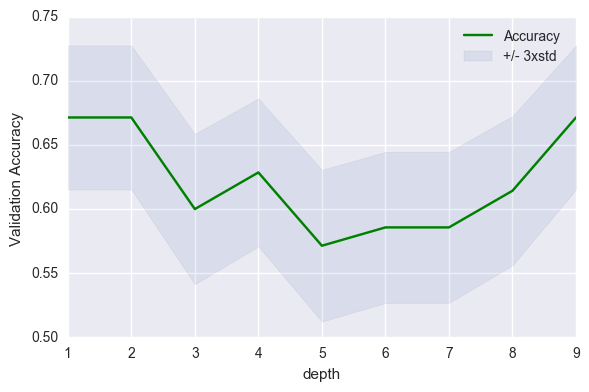

In [229]:
from sklearn.tree import DecisionTreeClassifier

params = np.array(range(1,10))
mean_acc = np.zeros(len(params))
std_acc = np.zeros(len(params))
for n, param in enumerate(params):
    clf = DecisionTreeClassifier(criterion="entropy", max_depth = param).fit(X_train, y_train) 
    ypr = clf.predict(X_valid)
    mean_acc[n-1], std_acc[n-1] = mean_std_accuracy(y_valid, ypr)    
print(mean_acc)    
    
plot_mean_std_accuracy(params, mean_acc, std_acc, "depth")

In [230]:
D = params[np.argmax(mean_acc)]
print("Optimal Depth=", D)
tree1 = DecisionTreeClassifier(criterion="entropy", class_weight="balanced", max_depth = D)
tree1.fit(X_train,y_train)

ytree_valid, ytree_test = evaluate(tree1, 'Decision Tree', X_valid, y_valid, X_test, y_test) 
ytree_test

Optimal Depth= 1
       Algorithm   Jaccard  F1-score LogLoss
0            KNN  0.740741  0.660427      NA
1  Decision Tree  0.592593  0.609568      NA


array(['PAIDOFF', 'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'PAIDOFF'], dtype=object)

Plot tree

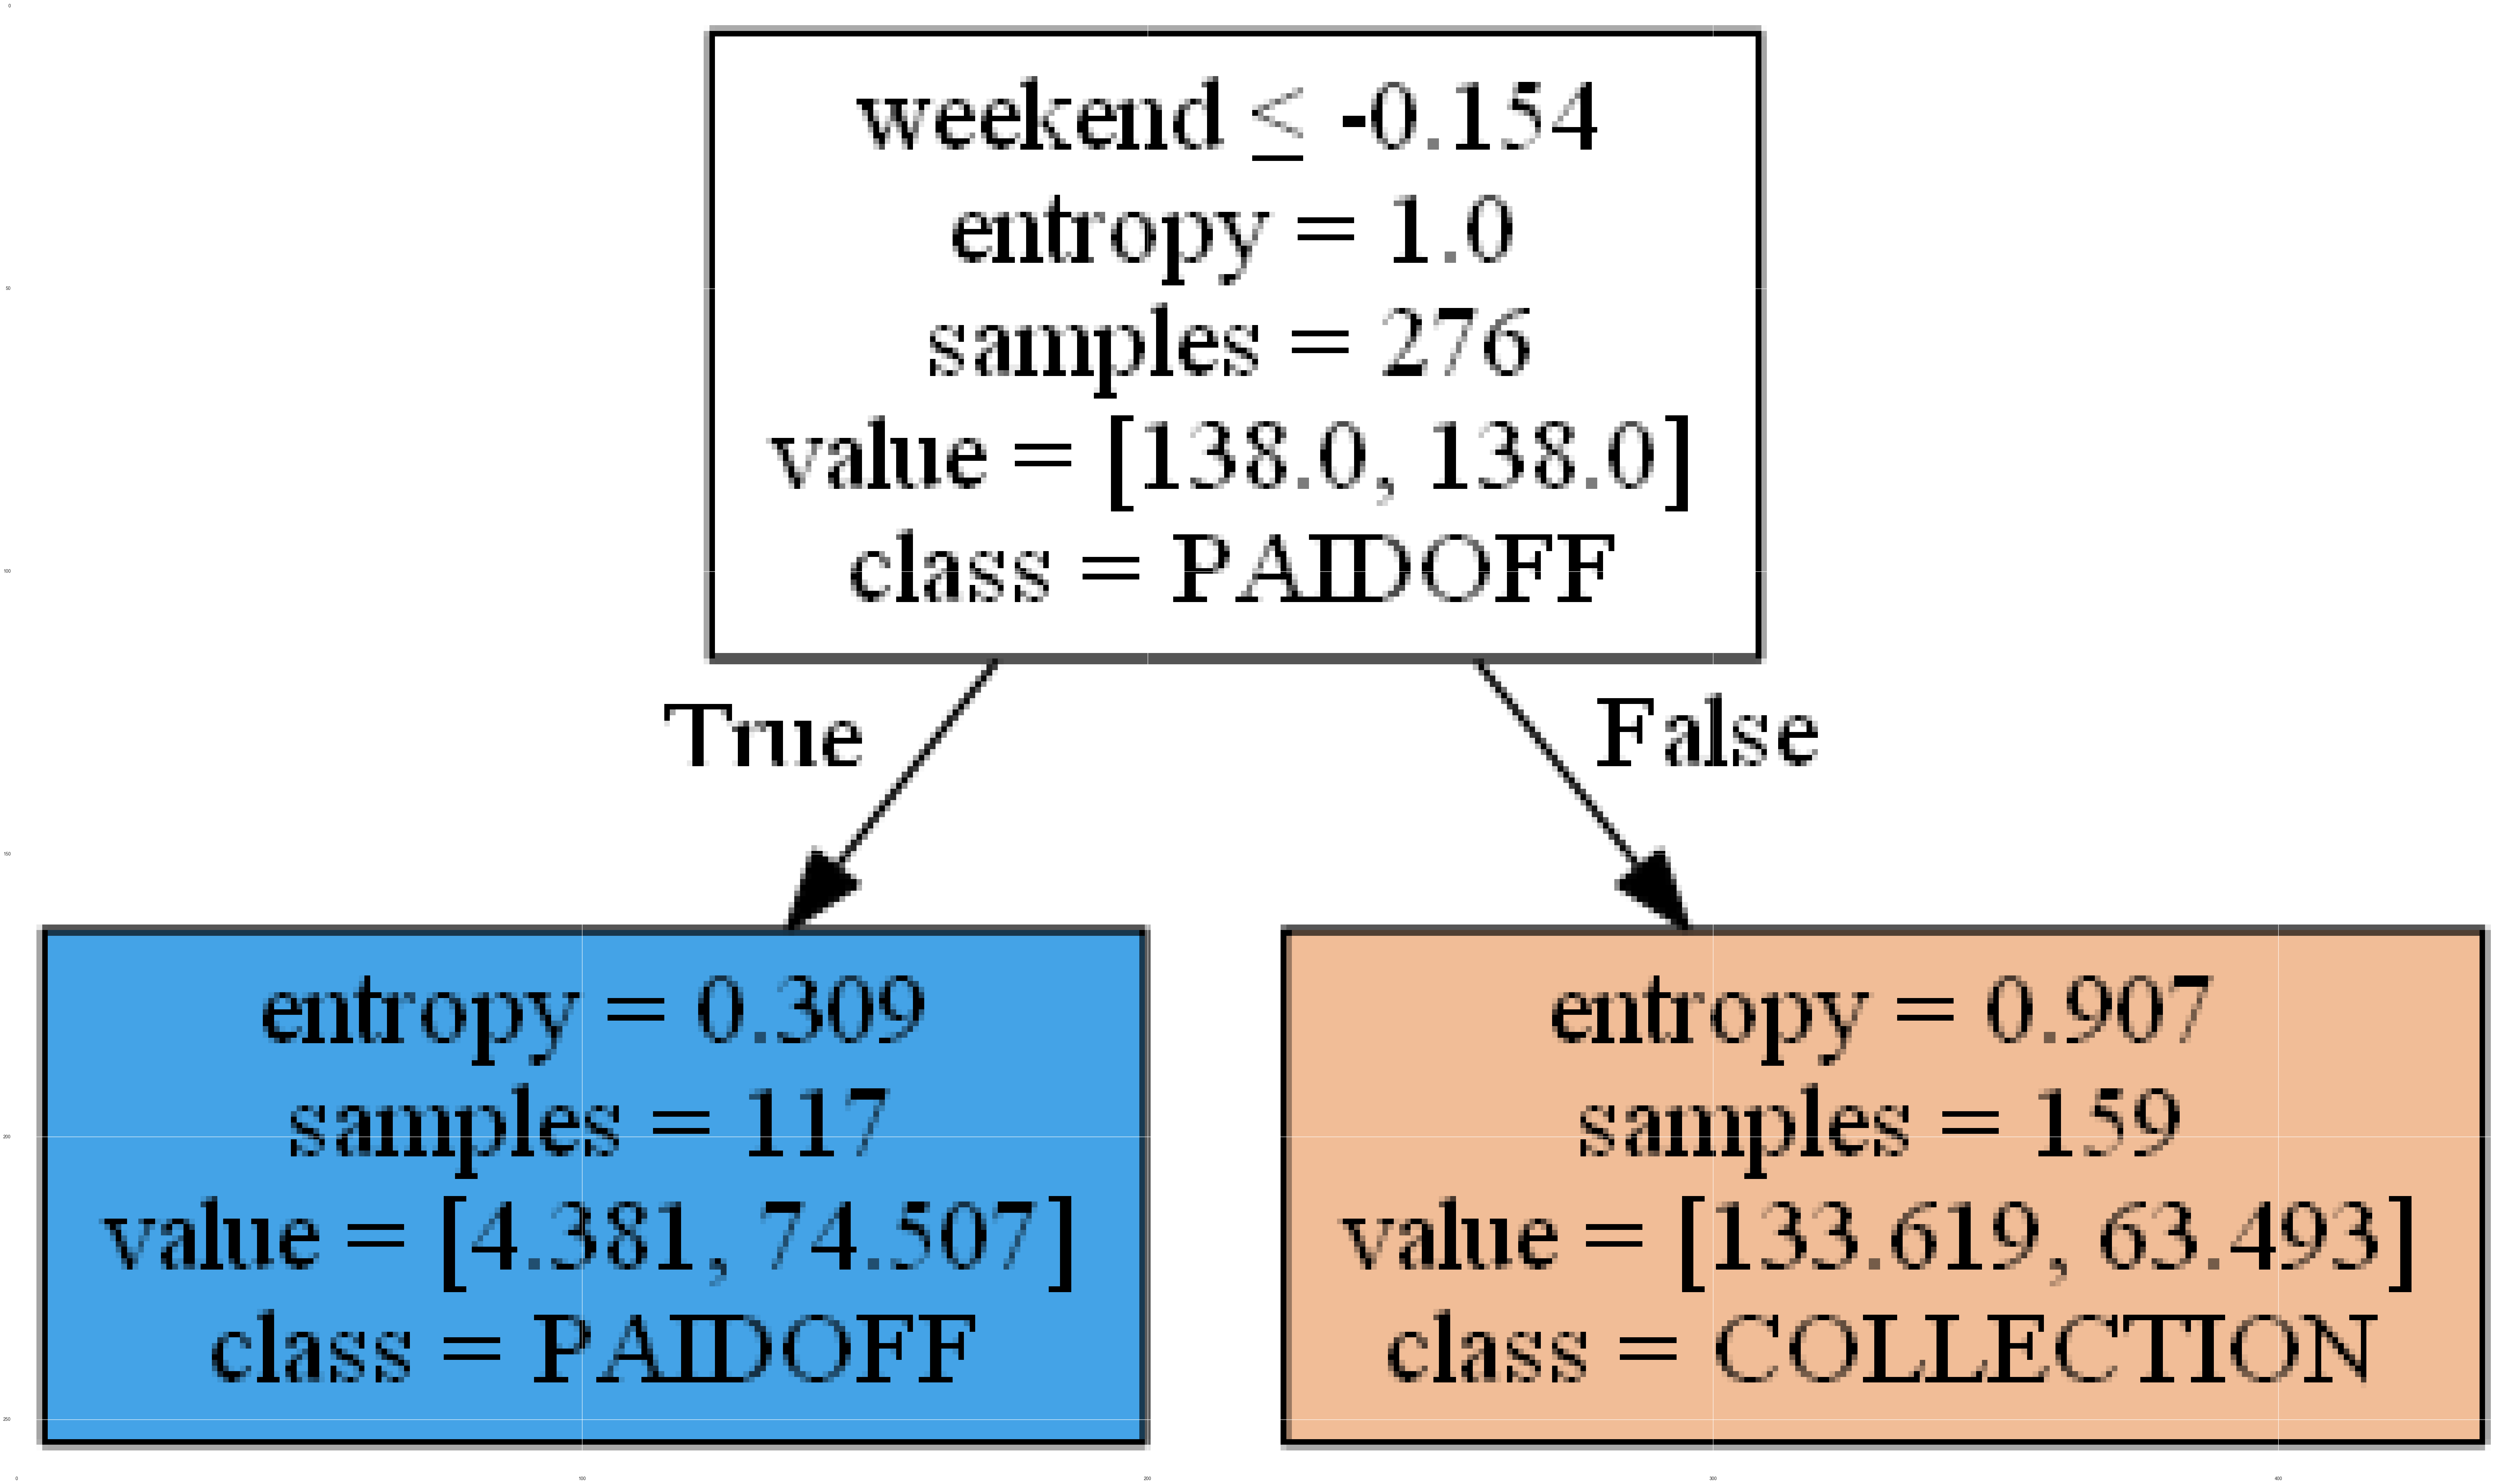

In [231]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

dot_data = StringIO()
filename = "loantree.png"
out = tree.export_graphviz(tree1, feature_names=Feature.columns, out_file=dot_data, class_names= np.unique(y), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

# Support Vector Machine

[0.66 0.67 0.61 0.6  0.67]


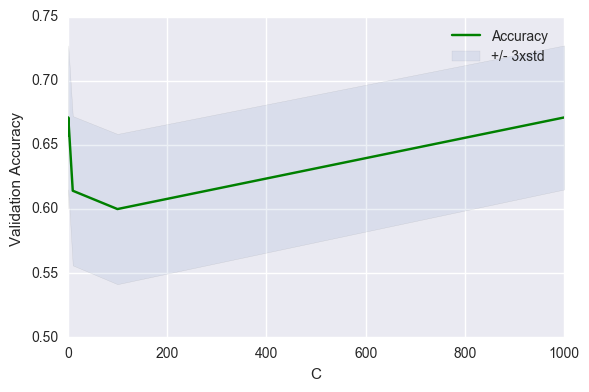

In [232]:
from sklearn import svm

#params = np.array(['linear', 'rbf']) # kernels
#params = np.array([0.1, 1, 10, 100]) # gammas
params = np.array([0.1, 1, 10, 100, 1000]) # Cs
mean_acc = np.zeros((params.size))
std_acc = np.zeros((params.size))
for n, param in enumerate(params):
    clf = svm.SVC(kernel='rbf', C=param).fit(X_train, y_train)     
    ypr = clf.predict(X_valid)
    mean_acc[n-1], std_acc[n-1] = mean_std_accuracy(y_valid, ypr)    
print(mean_acc)    

plot_mean_std_accuracy(params, mean_acc, std_acc, "C")

In [233]:
C = params[np.argmax(mean_acc)]
print("Optimal C=", C)
svm = svm.SVC(kernel="rbf",C=C)
svm.fit(X_train, y_train) 

ysvm_valid, ysvm_test = evaluate(svm, 'SVM', X_valid, y_valid, X_test, y_test) 
ysvm_test

Optimal C= 1.0
       Algorithm   Jaccard  F1-score LogLoss
0            KNN  0.740741  0.660427      NA
1  Decision Tree  0.592593  0.609568      NA
2            SVM  0.722222  0.621266      NA


array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF'], dtype=object)

# Logistic Regression

#### Train on X_train, evaluate on X_valid for different C to find the optimal C with maximal validation accuracy

[0.6 0.6 0.6 0.6 0.6 0.6]


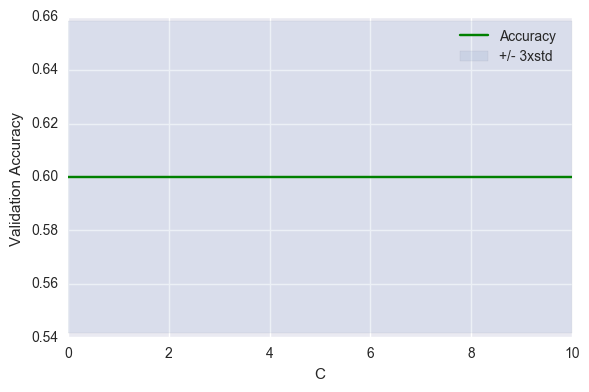

In [234]:
from sklearn.linear_model import LogisticRegression

# Train on X_train, evaluate on X_valid for different C
params = np.array([0.0001, 0.001, 0.01, 0.1, 1, 10]) # Cs
mean_acc = np.zeros((params.size))
std_acc = np.zeros((params.size))
for n, C in enumerate(params):
    LR = LogisticRegression(C=C, solver='liblinear').fit(X_train,y_train)    
    ylr = LR.predict(X_valid)
    mean_acc[n-1], std_acc[n-1] = mean_std_accuracy(y_valid, ypr)    
print(mean_acc)    
    
# Plot validation accuracy vs C values
plot_mean_std_accuracy(params, mean_acc, std_acc, "C")

In [235]:
C = params[np.argmax(mean_acc)]
print("Optimal C=", C)
LR = LogisticRegression(C=C, solver='liblinear').fit(X_train,y_train)

ylr_valid, ylr_test = evaluate(LR, 'Logistic Regression', X_valid, y_valid, X_test, y_test) 
ylr_test

Optimal C= 0.0001
             Algorithm   Jaccard  F1-score   LogLoss
0                  KNN  0.740741  0.660427        NA
1        Decision Tree  0.592593  0.609568        NA
2                  SVM  0.722222  0.621266        NA
3  Logistic Regression  0.796296  0.758350  0.690277


array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF'], dtype=object)

# Model Evaluation using Test set

<font color="red">
Remember, we loaded the test set from loan_test.csv so that test data could be preprocessed together with training and validation data? 
<p>
We have already computed Jaccard similarity score, F1-score and logloss score for all 4 classifiers on validation and test data, so we just need to print our final report.
</font>

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

## Validation Accuracy 

We have used Validation Jaccard  Similarity Score to select optimal parameters for classifiers (K, depth, C). Accuracy measures can be used for comparing models of different types as well.

In [236]:
df_report_valid
df_report_valid.set_index(["Algorithm", "Jaccard", "F1-score", "LogLoss"])

,,,
Algorithm,Jaccard,F1-score,LogLoss
KNN,0.671429,0.637007,NA
Decision Tree,0.642857,0.644534,NA
SVM,0.657143,0.532512,NA
Logistic Regression,0.685714,0.648042,0.690870606280103


## Test Accuracy

In [237]:
df_report_test 
df_report_test.set_index(["Algorithm", "Jaccard", "F1-score", "LogLoss"])

,,,
Algorithm,Jaccard,F1-score,LogLoss
KNN,0.740741,0.660427,NA
Decision Tree,0.592593,0.609568,NA
SVM,0.722222,0.621266,NA
Logistic Regression,0.796296,0.758350,0.6902772602797974


## Test Data: True Labels vs Predicted Labels

Our classifiers tend to lazily label all test samples as PAIDOFF, i.e. the most frequent class in the dataset.

In [238]:
df_pr_test = pd.DataFrame(list(zip(y_test, yknn_test, ytree_test, ysvm_test, ylr_test)), 
               columns =['True', 'KNN', 'Tree', 'SVM', 'LogReg']) 
df_pr_test

,True,KNN,Tree,SVM,LogReg
0,PAIDOFF,PAIDOFF,PAIDOFF,PAIDOFF,PAIDOFF
1,PAIDOFF,PAIDOFF,COLLECTION,PAIDOFF,PAIDOFF
2,PAIDOFF,PAIDOFF,COLLECTION,PAIDOFF,PAIDOFF
3,PAIDOFF,PAIDOFF,COLLECTION,PAIDOFF,PAIDOFF
4,PAIDOFF,COLLECTION,COLLECTION,COLLECTION,PAIDOFF
5,PAIDOFF,PAIDOFF,COLLECTION,PAIDOFF,PAIDOFF
6,PAIDOFF,PAIDOFF,COLLECTION,PAIDOFF,PAIDOFF
7,PAIDOFF,PAIDOFF,COLLECTION,PAIDOFF,PAIDOFF
8,PAIDOFF,PAIDOFF,COLLECTION,PAIDOFF,PAIDOFF
9,PAIDOFF,PAIDOFF,COLLECTION,PAIDOFF,PAIDOFF


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>